In [45]:
# Importing Packages
import matplotlib.pyplot as plt
import random
import numpy as np

In [46]:
# Rates of Students
normal_student_rates = {
    'Rate-Up Char': 0.007,
    '3 Star': 0.023,
    '2 Star': 0.185,
    '1 Star': 0.785
}

# Student Rates during Fest Banners
fest_student_rates = {
    'Rate-Up Char': 0.007,
    'Fest Char': 0.003,
    '3 Star': 0.05,
    '2 Star': 0.185,
    '1 Star': 0.755
}


In [47]:
# Probability Functions

# Pull Function Rate-Up Char
def simulate_pulls_rate(rates, num_pulls):
    rate_up_obtained = False
    for _ in range(num_pulls):
        random_number = random.random()
        cumulative_prob = 0
        for student, prob in rates.items():
            cumulative_prob += prob
            if random_number <= cumulative_prob:
                if student == 'Rate-Up Char':
                    rate_up_obtained = True
                    break
        if rate_up_obtained:
            break

    return rate_up_obtained

# Pull Function 3 Star (Including Rate-Up)
def simulate_pulls_3(rates, num_pulls):
    obtained_3_star = False
    for _ in range(num_pulls):
        random_number = random.random()
        cumulative_prob = 0
        for student, prob in rates.items():
            cumulative_prob += prob
            if random_number <= cumulative_prob:
                if student == 'Rate-Up Char' or student == '3 Star':
                    obtained_3_star = True
                    break
                
        if obtained_3_star:
            break

    return obtained_3_star


In [48]:
# Number of simulations
num_simulations = 10000
max_pulls = 200
pulls_interval = 10

In [49]:
# Perform simulations for normal rates
normal_probabilities = []
three_star_probabilities = []
for num_pulls in range(10, max_pulls + 1, pulls_interval):
    rate_up_count = sum(simulate_pulls_rate(normal_student_rates, num_pulls) for _ in range(num_simulations))
    rate_up_probability = rate_up_count / num_simulations
    normal_probabilities.append(rate_up_probability)

    three_star_count = sum(simulate_pulls_3(normal_student_rates, num_pulls) for _ in range(num_simulations))
    three_star_probability = three_star_count / num_simulations
    three_star_probabilities.append(three_star_probability)

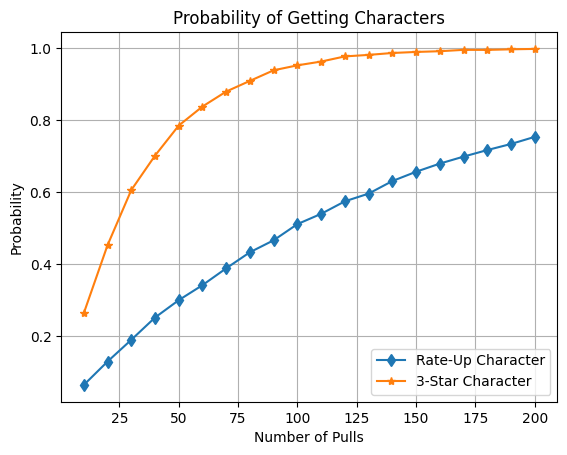

In [53]:
# Plotting
x_values = list(range(10, max_pulls + 1, pulls_interval))

plt.plot(x_values, normal_probabilities, label='Rate-Up Character', marker='d')
plt.plot(x_values, three_star_probabilities, label='3-Star Character', marker='*')
plt.xlabel('Number of Pulls')
plt.ylabel('Probability')
plt.title('Probability of Getting Characters')
plt.legend()
plt.grid(True)
plt.show()